# Лабораторная работа № 1
# Бабичева Анна М8О-404Б-17
# Вариант № 2

### Задание. Рассматривается модель измерения некоторого параметра $\theta$ со случайными ошибками: $$y_m=\theta + \epsilon_m,\quad m=1,...100$$ где $\epsilon_m$ - центрированные независимые одинаково распределенные случайные величины. Методом статистического моделирования найсти с.к.-погрешности МНК-оценки и МНМ-оценки параметра $\theta$ для различных вариантов распределения ошибок. Дать сравнительный анализ полученных оценок по их точности и чувствительности к виду закона распределения ошибок. 

### Точное значение $\theta$: $$\theta=-3$$

### Законы распределения ошибок:$$1) N(0,1)$$ $$2) R[-\sqrt3,\sqrt3]$$ $$3) f_{\epsilon}=0.9N(0,1)+0.1K(1)$$


Импортирую необходимые библиотеки:

In [1]:
import time
import math

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.optimize import minimize

## Моделирование равномерного распределения

Случайное число из интервала $(0, 1)$ преобразуется в случайное число на $(a,b)$ с помощью формулы:

$$\xi=(b-a)\eta+a$$

где $\eta\mathtt{\sim}R(0,1),\quad \xi\mathtt{\sim}R(a,b)$

Моделирование случайной величины, равномерно распределенной на $(0,1)$ реализуется с помощью конгруэнтно-мультипликативного метода:

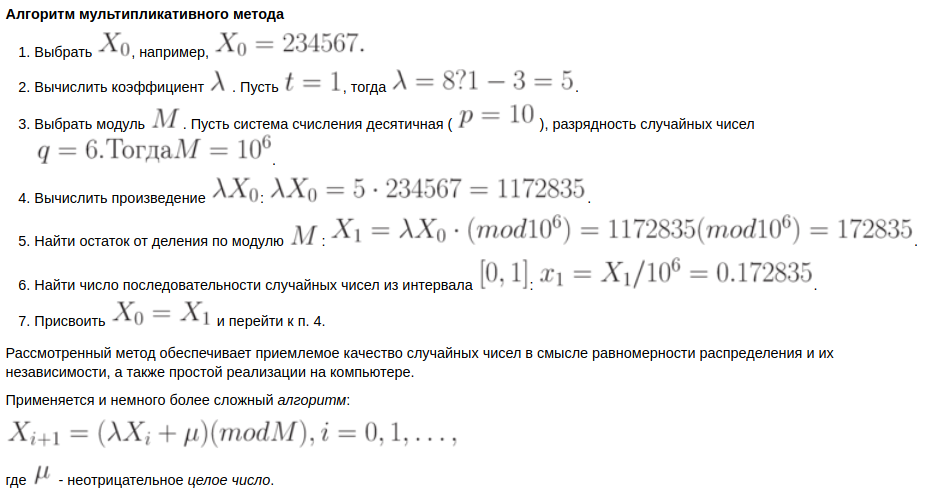

$X_0,\mu$ будут вычисляться с помощью текущего времени.

In [68]:
# равномерное распределение на (0, 1)
def R01(n, t, q, p, X0):
    M = p ** q
    if X0 == None:
        X0 = round(time.time() * M)
        if X0 % 2 == 0:
            X0 -= 1
    mu = round(time.time() / 100)
    
    l = 8 * t - 3
    X = []
    for i in range(n):
        X1 = (l * X0 + mu) % M
        X.append(X1 / M)
        X0 = X1
    return X
# равномерное распределение на (a, b)
def R(a=-math.sqrt(3), b=math.sqrt(3), n=1, t=1, q=6, p=10, X0=None):
    X = R01(n, t, q, p, X0)
    Y = [(b - a) * x + a for x in X]
    return np.array(Y)

Смоделирую выборку на интервале $(3,7)$ и построю график выборочной плотности вероятности:

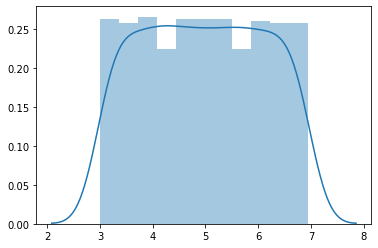

In [41]:
X = np.array(R(3, 7, n=1000))
snsplot = sns.distplot(X)

Можно увидеть, что выборочная плотность вероятности схожа с плотностью вероятности равномерного распределения на заданном интервале:

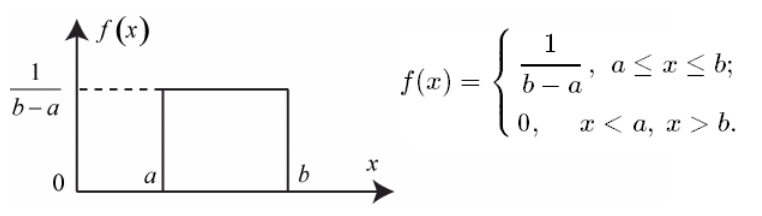

$\frac{1}{b-a}=\frac{1}{7-3}=\frac{1}{4}=0.25$

## Моделирование нормального распределения

Случайная величина $\xi$ с мат. ожиданием $m_{\xi}$ и дисперсией $\sigma^2_{\xi}$ моделируется с помощью формулы:

$$\xi=\sigma_{\xi}\eta+m_{\xi}$$

где $\eta\mathtt{\sim}N(0,1),\quad \xi\mathtt{\sim}N(m_{\xi},\sigma^2_{\xi})$

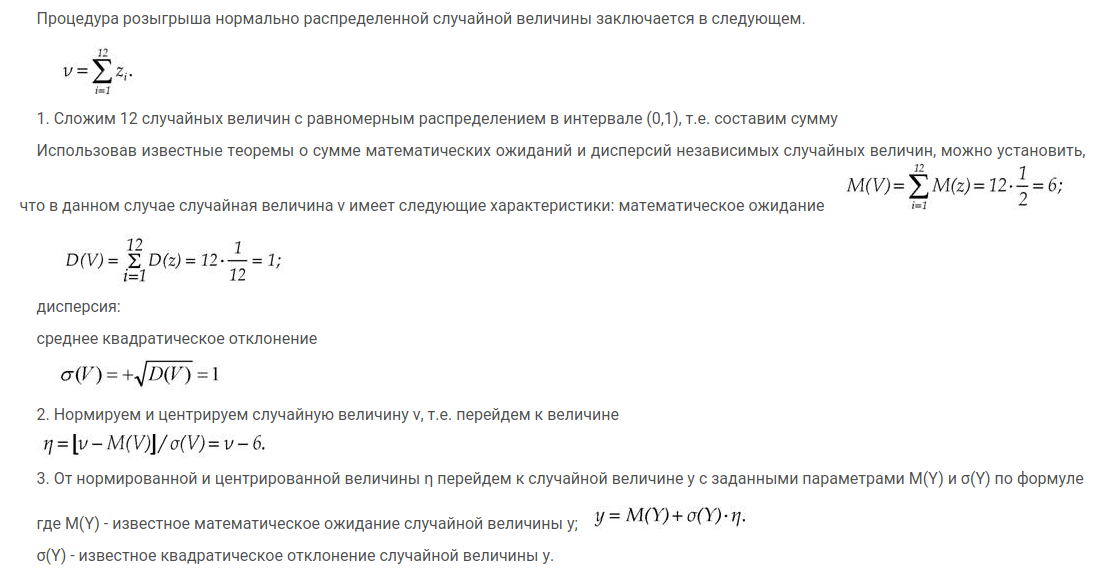

In [76]:
# нормальное распределение с m=0 sigma=1
def N01(n):
    X = []
    for i in range(n):
        r = R(a=0, b=1, n=12)
        X.append((sum(r) - 6) / 1)
    return X
# нормальное распределение с m=m sigma=sigma
def N(m=0, sigma=1, n=1):
    X = N01(n)
    Y = [sigma * x + m for x in X]
    return np.array(Y)

Смоделирую выборку с мат. ожиданием 0 и дисперсией 1 и построю график выборочной плотности вероятности:

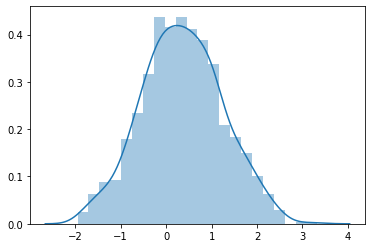

In [84]:
X = np.array(N(0, 1, n=1000))
snsplot = sns.distplot(X)

Можно увидеть, что выборочная плотность вероятности схожа с плотностью вероятности стандартного нормального распределения:

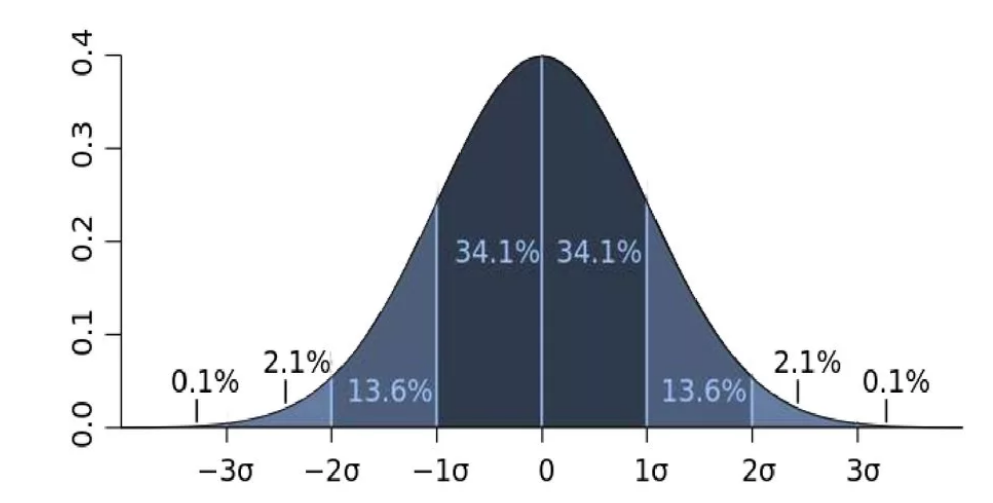

## Моделирование распределения Коши

Распределение Коши описывает отношение двух нормально распределенных случайных величин. В отличие от других распределений, для распределения Коши не определены матожидание и дисперсия. 

Для воспроизведения значений случайной величины $X$ с распределением Коши можно использовать соотношение $X=\frac{Y}{Z}$, где $Y,Z$ - независимые стандартные нормальные случайные величины.

In [107]:
# распределение Коши
def K(a=1, n=1):
    Y = N(0, 1, n)
    Z = N(0, 1, n)
    X = [a * Y[i] / Z[i] for i in range(len(Y))]
    return np.array(X)

Смоделирую выборку с параметром масшатаба, равным 1. Так как распределение имеет тяжелые хвосты, выборка будет небольшой:

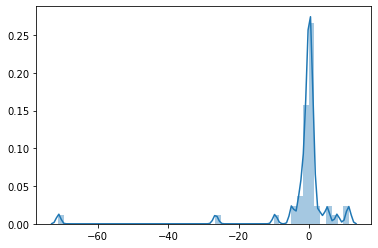

In [131]:
X = np.array(K(n=50))
snsplot = sns.distplot(X)

Так как выборка небольшая, график получился менее гладкий, чем в предыдущих примерах, но он все равно напоминает искомый с параметрами сдвига 0 и масштаба 1:

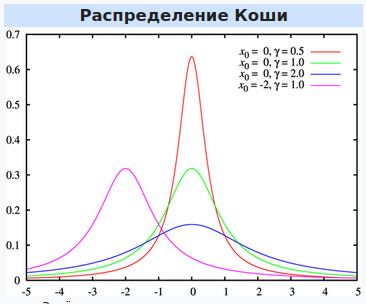

## МНК

In [6]:
# МНК 
def MNK(X, Y, m=0):
    if m < 0:
        raise Exception("m must be >= 0")
    H = []
    for i in range(m + 1):
        H.append(X ** i)
    H = np.array(H).T
    O_ = (np.linalg.inv(H.T.dot(H)).dot(H.T)).dot(Y)
    return O_
# функция МНК для отрисовки
def fMNK(O):
    return lambda x: sum([O[i] * x ** i for i in range(len(O))])

## МНМ

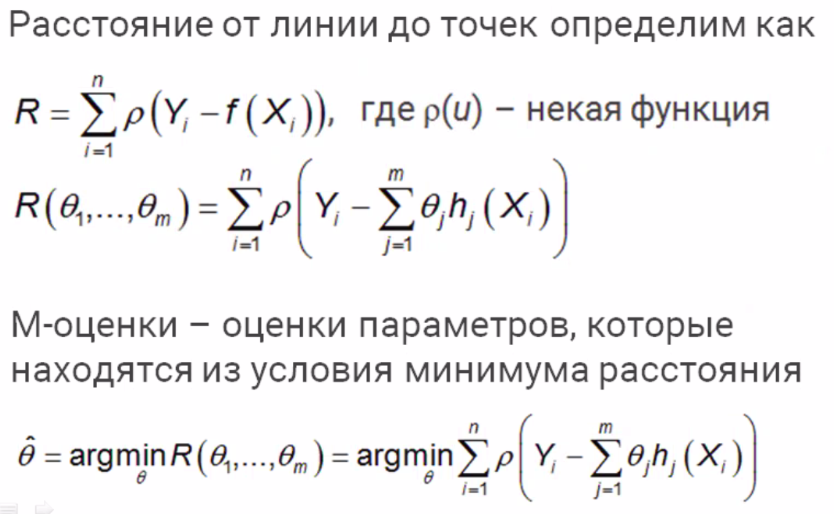

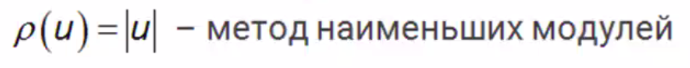

Аргминимум буду искать с помощью встроенных функций python. Нулевое значение будет соответсвовать значению МНК-оценки.

In [7]:
# чтобы интерпретатор не ругался
X = np.ones(3)
Y = np.ones(3)

In [8]:
# модуль
def mod(u):
    return abs(u)
# функция R
def fR(O_):
    return sum([mod(Y[i] - O_) for i in range(len(Y))])
# МНМ
def MNM(O_=MNK(X, Y)):
    res = minimize(fR, O_, method='nelder-mead',
        options={'xtol': 1e-8, 'disp': True})
    return res.x
# функция МНМ для отрисовки
def fMNM(O):
    return lambda x: O

## Реализации $y_m$

Для реализации $y_m$ необходимо получить реализации ошибок $\epsilon_m$. Моделирование ошибок будет производиться с учетом их закона рапределения:

In [9]:
# theta
O = -3
# реализации ошибок
def Eps(n, f):
    return np.array(f(n=n))
# реализации y
def y(n, f):
    return O + Eps(n, f)

## С.к.-погрешность

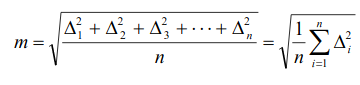

где $\Delta_i=Y_i-\hat Y_i$

In [10]:
def m(Y, Y_):
    return math.sqrt(sum([(Y[i] - Y_[i]) ** 2 for i in range(len(Y))]) / len(Y))

### $1) N(0,1)$

Получим реализации измерений и построим график для полученных реализаций:


In [135]:
# 100 реализаций
n = 100
# значения x не играют роли, так как наш график --> к theta
X = np.arange(n)
# реализации y
Y = y(n, N)

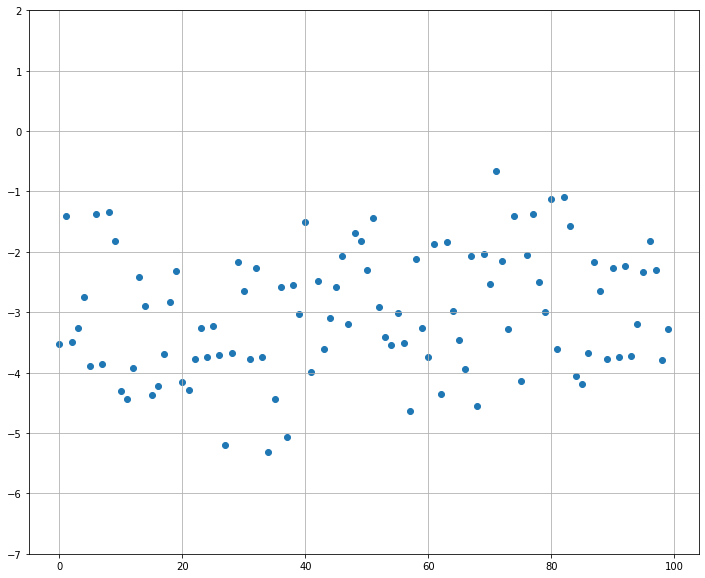

In [93]:
# график
fig = plt.figure(figsize=(12, 10))

plt.ylim(-7, 2)
plt.grid()
plt.scatter(X, Y)

#### МНК

Получим МНК-оценку параметра:


In [94]:
O1_MNK = MNK(X, Y)
print("МНК-оценка = {}".format(O1_MNK))

МНК-оценка = [-3.0144512]


Построим совмещенные графики реализаций и полученной МНК-оценки:


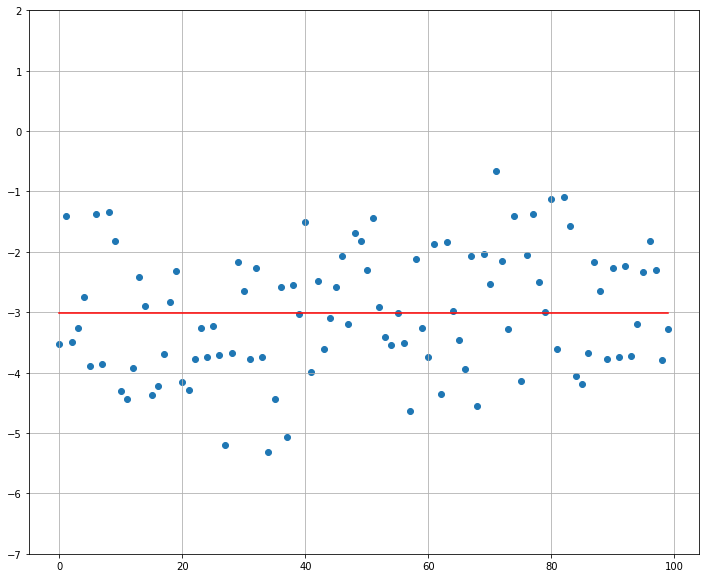

In [95]:
# функция полученной МНК-оценки
f = fMNK(O1_MNK)
# оценка y
Y_ = [f(x) for x in X]
# график
fig = plt.figure(figsize=(12, 10))

plt.ylim(-7, 2)
plt.grid()
plt.scatter(X, Y)
plt.plot(X, Y_, color="red")

Вычислю с.к.-погрешность:


In [96]:
eps = m(Y, Y_)
print("С.к.-погрешность = {}".format(eps))

С.к.-погрешность = 1.0214135131129607


Разница между $\theta$ и $\hat \theta_{МНК}$:

In [97]:
print("O - O^ = {}".format(O - O1_MNK))

O - O^ = [0.0144512]


#### МНМ

Получим МНМ-оценку параметра:


In [99]:
O1_MNM = MNM()
print("МНМ-оценка = {}".format(O1_MNM))

Optimization terminated successfully.
         Current function value: 86.558760
         Iterations: 35
         Function evaluations: 82
МНМ-оценка = [-3.1]


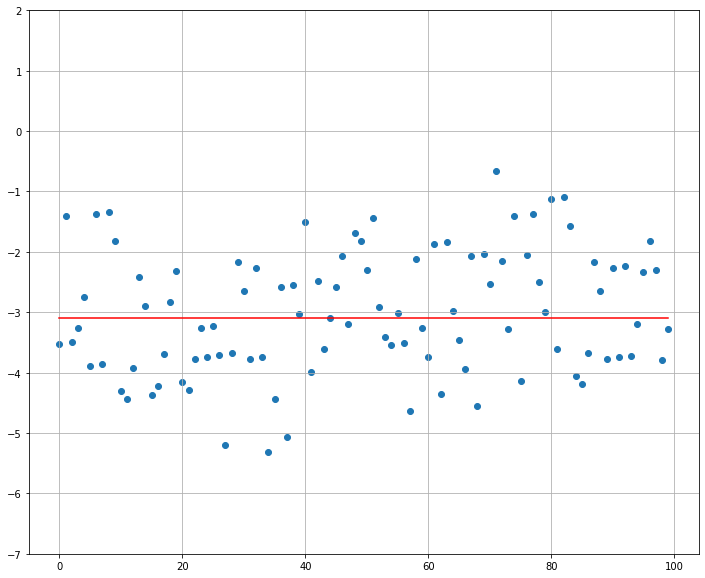

In [100]:
# функция полученной МНМ-оценки
f = fMNM(O1_MNM)
# оценка y
Y_ = [f(x) for x in X]
# график
fig = plt.figure(figsize=(12, 10))

plt.ylim(-7, 2)
plt.grid()
plt.scatter(X, Y)
plt.plot(X, Y_, color="red")

Вычислю с.к.-погрешность:

In [101]:
eps = m(Y, Y_)
print("С.к.-погрешность = {}".format(eps))

С.к.-погрешность = 1.0249898350477438


Разница между $\theta$ и $\hat \theta_{МНМ}$:

In [103]:
print("O - O^ = {}".format(O - O1_MNM))

O - O^ = [0.1]


### $2) R[-\sqrt3,\sqrt3]$

Получим реализации измерений и построим график для полученных реализаций:

In [11]:
Y = y(n, R)

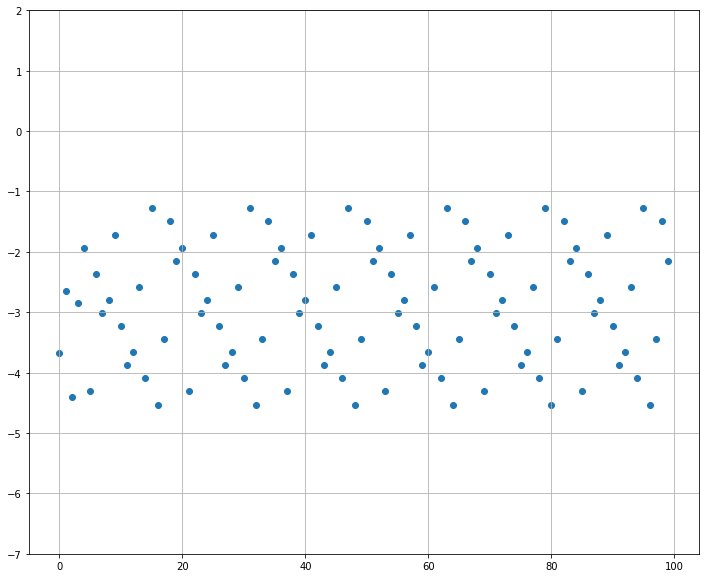

In [12]:
# график
fig = plt.figure(figsize=(12, 10))

plt.ylim(-7, 2)
plt.grid()
plt.scatter(X, Y)

#### МНК

Получим МНК-оценку параметра:

In [13]:
O2_MNK = MNK(X, Y)
print("МНК-оценка = {}".format(O2_MNK))

МНК-оценка = [-2.92472161]


Построим совмещенные графики реализаций и полученной МНК-оценки:

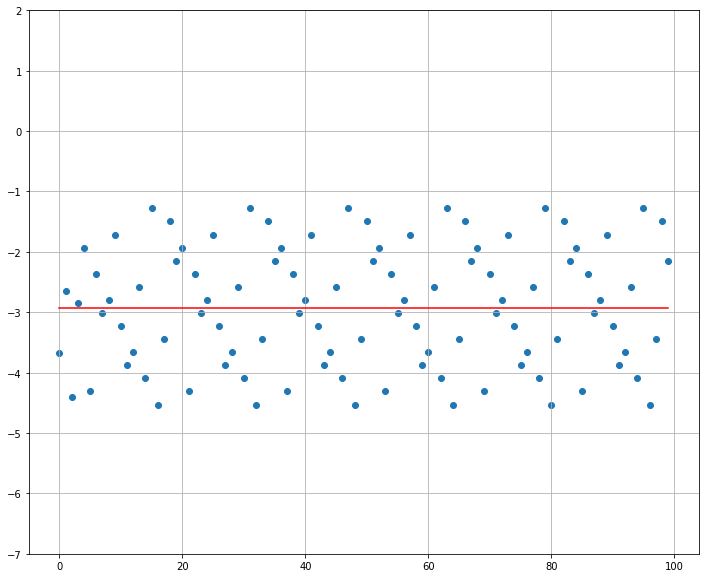

In [14]:
# функция полученной МНК-оценки
f = fMNK(O2_MNK)
# оценка y
Y_ = [f(x) for x in X]
# график
fig = plt.figure(figsize=(12, 10))

plt.ylim(-7, 2)
plt.grid()
plt.scatter(X, Y)
plt.plot(X, Y_, color="red")

Вычислю с.к.-погрешность:

In [15]:
eps = m(Y, Y_)
print("С.к.-погрешность = {}".format(eps))

С.к.-погрешность = 0.9925279400238564


Разница между $\theta$ и $\hat \theta_{МНК}$:

In [98]:
print("O - O^ = {}".format(O - O2_MNK))

O - O^ = [-0.07527839]


#### МНМ

Получим МНМ-оценку параметра:

In [17]:
O2_MNM = MNM()
print("МНМ-оценка = {}".format(O2_MNM))

Optimization terminated successfully.
         Current function value: 85.738593
         Iterations: 36
         Function evaluations: 89
МНМ-оценка = [-2.85]


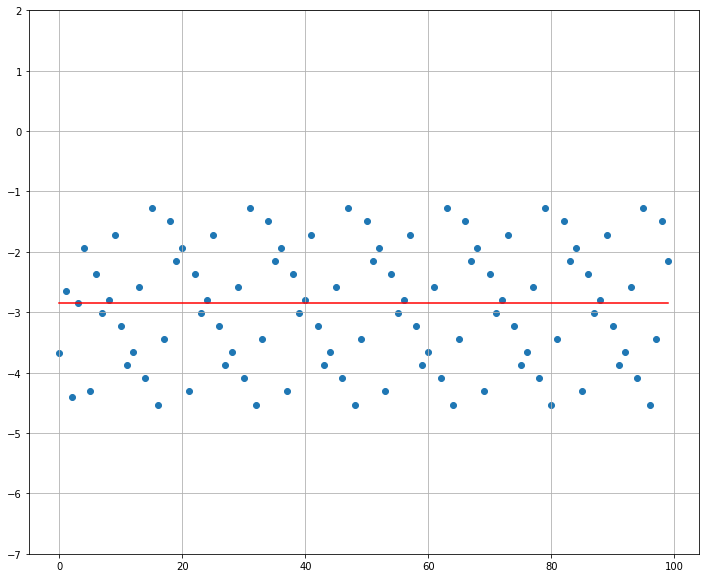

In [18]:
# функция полученной МНМ-оценки
f = fMNM(O2_MNM)
# оценка y
Y_ = [f(x) for x in X]
# график
fig = plt.figure(figsize=(12, 10))

plt.ylim(-7, 2)
plt.grid()
plt.scatter(X, Y)
plt.plot(X, Y_, color="red")

Вычислю с.к.-погрешность:

In [19]:
eps = m(Y, Y_)
print("С.к.-погрешность = {}".format(eps))

С.к.-погрешность = 0.9953366417451092


Разница между $\theta$ и $\hat \theta_{МНМ}$:

In [104]:
print("O - O^ = {}".format(O - O2_MNM))

O - O^ = [-0.15]


### $3) f_{\epsilon}=0.9N(0,1)+0.1K(1)$

Для реализации такой функции распределения мне понадобятся нормальное распределение, распределение Коши и равномерное распределение для моделирования весов:

In [132]:
# распределение f_e
def f_e(n=1):
    koeff = R(a=0,b=1, n=1)[0]
    if koeff <= 0.9:
        X = N(0, 1, n)
    else:
        X = K(1, n)
    return np.array(X)

Получим реализации измерений и построим график для полученных реализаций:

In [136]:
Y = y(n, f_e)

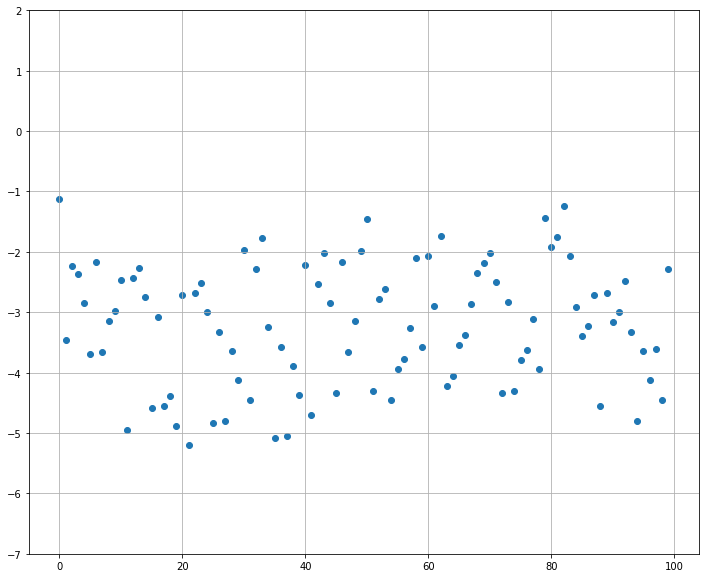

In [137]:
# график
fig = plt.figure(figsize=(12, 10))

plt.ylim(-7, 2)
plt.grid()
plt.scatter(X, Y)

#### МНК

Получим МНК-оценку параметра:


In [138]:
O3_MNK = MNK(X, Y)
print("МНК-оценка = {}".format(O3_MNK))

МНК-оценка = [-3.210176]


Построим совмещенные графики реализаций и полученной МНК-оценки:


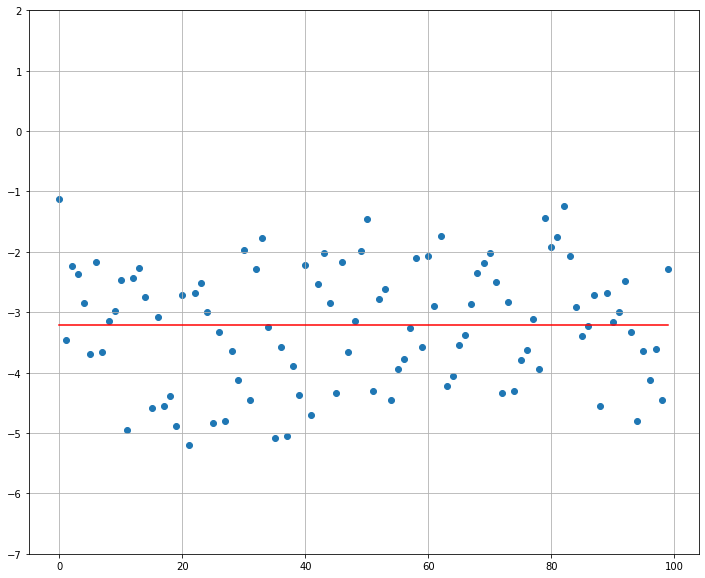

In [139]:
# функция полученной МНК-оценки
f = fMNK(O3_MNK)
# оценка y
Y_ = [f(x) for x in X]
# график
fig = plt.figure(figsize=(12, 10))

plt.ylim(-7, 2)
plt.grid()
plt.scatter(X, Y)
plt.plot(X, Y_, color="red")

Вычислю с.к.-погрешность:


In [140]:
eps = m(Y, Y_)
print("С.к.-погрешность = {}".format(eps))

С.к.-погрешность = 0.9959291105113864


Разница между $\theta$ и $\hat \theta_{МНМ}$:

In [142]:
print("O - O^ = {}".format(O - O3_MNK))

O - O^ = [0.210176]


#### МНМ

Получим МНМ-оценку параметра:


In [143]:
O3_MNM = MNM()
print("МНМ-оценка = {}".format(O3_MNM))

Optimization terminated successfully.
         Current function value: 83.871640
         Iterations: 35
         Function evaluations: 80
МНМ-оценка = [-3.14238281]


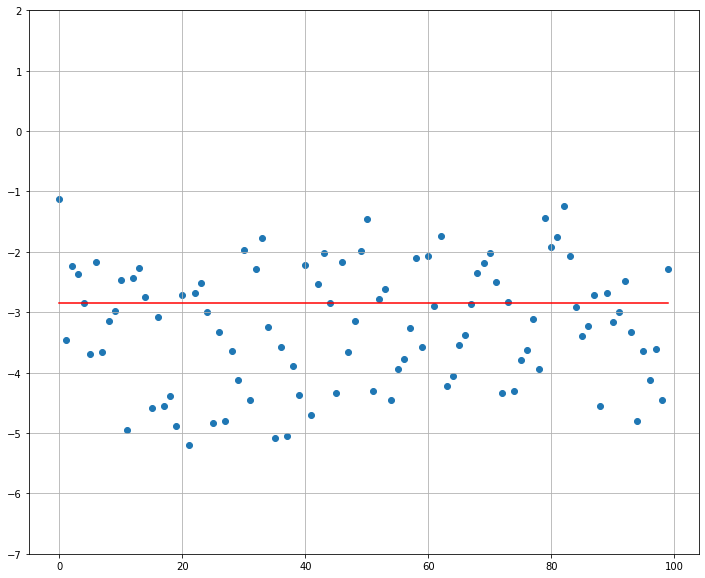

In [144]:
# функция полученной МНМ-оценки
f = fMNM(O2_MNM)
# оценка y
Y_ = [f(x) for x in X]
# график
fig = plt.figure(figsize=(12, 10))

plt.ylim(-7, 2)
plt.grid()
plt.scatter(X, Y)
plt.plot(X, Y_, color="red")

Вычислю с.к.-погрешность:


In [145]:
eps = m(Y, Y_)
print("С.к.-погрешность = {}".format(eps))

С.к.-погрешность = 1.0590569126066824


Разница между $\theta$ и $\hat \theta_{МНМ}$:

In [146]:
print("O - O^ = {}".format(O - O3_MNM))

O - O^ = [0.14238281]


## Вывод

#### Анализ МНК

Были получены следующие МНК-оценки параметра $\theta$ для трех случаев:

$1) N(0,1)$

$2) R[-\sqrt3,\sqrt3]$ 

$3) f_{\epsilon}=0.9N(0,1)+0.1K(1)$

In [147]:
print("O1_MNK = {}".format(O1_MNK))
print("O2_MNK = {}".format(O2_MNK))
print("O3_MNK = {}".format(O3_MNK))

O1_MNK = [-3.0144512]
O2_MNK = [-2.92472161]
O3_MNK = [-3.210176]


Точное значение параметра:

In [148]:
print("O = {}".format(O))

O = -3


Наиболее точной является МНК-оценка для стандартных гауссовских ошибок, что было предсказуемо, так как МНК-оценка для данного распределения ошибок явялется лучшей несмещенной оценкой.

Хуже всего себя показала МНК-оценка для 3 варианта распределения ошибок, так как распределение Коши не имеет моментов и обладает тяжелыми хвостами. Вклад распределения Коши в 3 вариант распределения ошибок можно интерпретировать как выбросы.

#### Анализ МНМ

Были получены следующие МНМ-оценки параметра $\theta$ для трех случаев:

In [149]:
print("O1_MNM = {}".format(O1_MNM))
print("O2_MNM = {}".format(O2_MNM))
print("O3_MNM = {}".format(O3_MNM))

O1_MNM = [-3.1]
O2_MNM = [-2.85]
O3_MNM = [-3.14238281]


МНМ-оценка лучше всего себя показала для стандартных гауссовских ошибок. МНМ-оценка для 3-его варианта распределения не намного хуже, чем для 1-го, так как МНМ-оценки более устойчивы к выбросам.

Хуже всех себя показала МНМ-оценка для равномерно распределенных ошибок.

#### Анализ МНК и МНМ

Выберу наиболее точные МНК- и МНМ-оценки:

In [150]:
print("O1_MNK = {}".format(O1_MNK))
print("O1_MNM = {}".format(O1_MNM))

O1_MNK = [-3.0144512]
O1_MNM = [-3.1]


Точное значение параметра:

In [151]:
print("O = {}".format(O))

O = -3


Данные оценки были получены при стандартном гауссовском распределении ошибок, но заметно более точной оказалась МНК-оценка, так как она является лучшей несмещенной для данного распределения ошибок.

Стоит отметить также, что вычислительно более легкой явялется МНК-оценка, так как для нее существует аналитическая формула. МНМ-оценка же вычислялась численным методом путем нахождения минимума функции, что тоже, в свою очередь, оказывает влияние на точность и погрешность. Однако для разреженных матриц вычисление МНК-оценки может стать проблемой из-за отсутствия обратной матрицы.

#### Общий итог

В данной лабораторной работе предлагалось смоделировать различные распределения случайных величин, а также получить выборку для измерений параметра с ошибками с заданными распределениями ошибок и оценить измеряемый параметр с помощью МНК и МНМ.

По итогам проделанной работы можно сказать, что наиболее точной оценкой при стандартных гауссовских ошибках является МНК-оценка. Также она достаточно неплохо работает для равномерного распределения ошибок. Однако при наличии выбросов в ошибках МНК-оценка наименее точная, в то время как МНМ-оценка показывает значительно более устойчивый результат.